# 분류

분류를 위한 선형 모델

> 교안2-20지도학습-소개.pdf / 분류

수행 버전

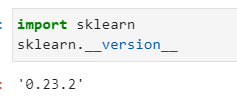

## 선형 회귀를 이용한 유방암 데이터셋 예측

In [ ]:
from sklearn import show_versions
show_versions()

### 로지스틱 회귀

분류용 선형 모델
 -  LinearRegression, SVC(서포트 벡터 머신)

LogisticRegression, SVC 파라미터

- class_weight : 클래스에 대한 가중치들의 값
- random_state : 데이터를 섞을 때 사용하는 랜덤 번호 생성기의 시드 값
- penalty : 페널티를 부여할 때 사용할 기준을 결정('l1', 'l2')
- dual : Dual Formulation인지 Primal Formulation인지를 결정(True, False)
    - Prefer dual=False when n_samples > n_features
- C : 규칙의 강도의 역수 값
- solver : 최적화에 사용할 알고리즘 결정('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
- max_iter : solver가 수렴하게 만드는 최대 반복 횟수 값

max_iter

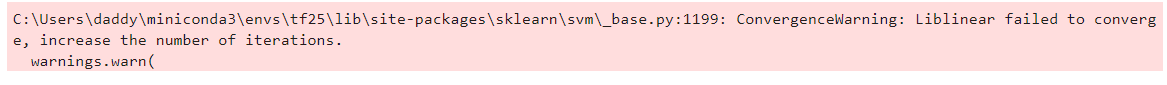

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.keys()

데이터프레임으로 표현

In [ ]:
# 데이터를 살펴봅시다
import pandas as pd
boston_df = pd.DataFrame(boston['data'], # 학습 데이터
                        columns=boston['feature_names'])
boston_df['TARGET'] = boston['target']
boston_df

`train_test_split()`
- test_size: 테스트 셋 구성의 비율을 나타냅니다. train_size의 옵션과 반대 관계에 있는 옵션 값이며, 주로 test_size를 지정해 줍니다. 0.2는 전체 데이터 셋의 20%를 test (validation) 셋으로 지정하겠다는 의미입니다. default 값은 0.25 입니다.
- shuffle: default=True 입니다. split을 해주기 이전에 섞을건지 여부입니다. 보통은 default 값으로 놔둡니다.
- stratify: default=None 입니다. classification을 다룰 때 매우 중요한 옵션값입니다. stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지해 줍니다. (한 쪽에 쏠려서 분배되는 것을 방지합니다) 만약 이 옵션을 지정해 주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.
- random_state: 세트를 섞을 때 해당 int 값을 보고 섞으며, 하이퍼 파라미터를 튜닝시 이 값을 고정해두고 튜닝해야 매번 데이터셋이 변경되는 것을 방지할 수 있습니다.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(
    cancer['data'], cancer['target'],
#     stratify=cancer.target,
    random_state=42
)

logreg = LogisticRegression(solver="liblinear").fit(X_train, y_train)
print("LOGREG 훈련 세트 점수: {:.2f}".format(logreg.score(X_train, y_train)))
print("LOGREG 테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

In [ ]:
# max_iter : 최대 순환 수
# ConvergenceWarning
# solver를 변경하거나 max_iter를 늘린다

### 선형 서포트 벡터 머신 (Support Vector Machine) 이용

유방암 데이터셋 예측

In [ ]:
# 서포트 벡터 머신 : 회귀, 분류 양쪽 모두에 사용
from sklearn.svm import LinearSVC

# Prefer dual=False when n_samples > n_features
svc = LinearSVC(dual=False, C=100)
svc.fit(X_train, y_train)

print("SVC 훈련 세트 점수: {:.2f}".format(svc.score(X_train, y_train)))
print("SVC 테스트 세트 점수: {:.2f}".format(svc.score(X_test, y_test)))

### 규제

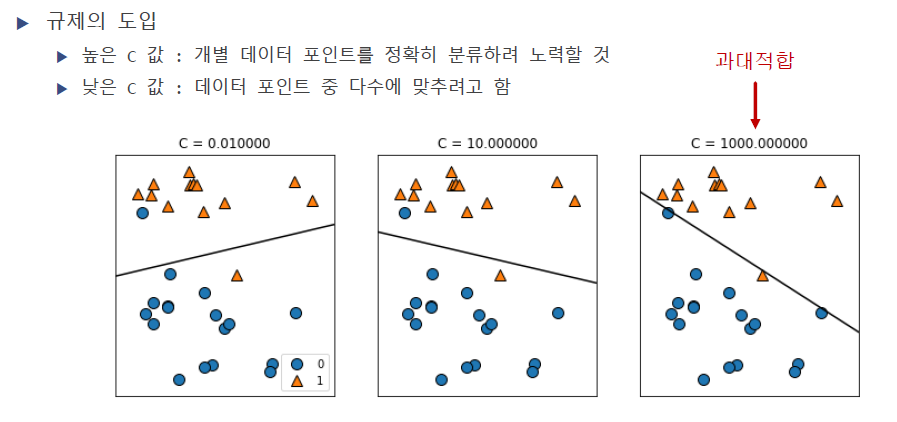

규제 변수에 따른 정확도의 변화
- 규제 강도에 따른 정확도
- 과적합 방지


In [ ]:
# 선형 회귀 모델에 규제 강도별 점수
logreg100 = LogisticRegression(solver="liblinear", C=100).fit(X_train, y_train)
logreg = LogisticRegression(solver="liblinear", ).fit(X_train, y_train) # 규제 C = 1
logreg001 = LogisticRegression(solver="liblinear", C=0.01).fit(X_train, y_train)

for c, model in zip([100, 1, 0.01], [logreg100, logreg, logreg001]):
    print("C={}".format(c))
    print("훈련 세트 점수: {:.2f}".format(model.score(X_train, y_train)))
    print("테스트 세트 점수: {:.2f}".format(model.score(X_test, y_test)))
# 기본적으로는 L2규제(Ridge)

#### - ex) SVC 로 규제를 동일하게 주어 비교
 -  C=100, C=1, C=0.01

In [ ]:
# SVC 
from sklearn.svm import LinearSVC

svc100 = LinearSVC(dual=False, C=1000).fit(X_train, y_train)   # 규제 C = 100
svc = LinearSVC(dual=False, C=1).fit(X_train, y_train)           # 규제 C = 1
svc001 = LinearSVC(dual=False, C=0.01).fit(X_train, y_train)

for c, model in zip([100, 1, 0.01], [svc100, svc, svc001]):
    print("C={}".format(c))
    print("훈련 세트 점수: {:.2f}".format(model.score(X_train, y_train)))
    print("테스트 세트 점수: {:.2f}".format(model.score(X_test, y_test)))
# 기본적으로는 L2규제(Ridge)

## 규제 방식의 변경: C, solver, penalty, max_iter 조절

 - penalty 매개변수를 이용 , 규제 방식을 변경할 수 있음

In [ ]:
# 규제 방식에 따른 정확도 확인
l1lr100 = LogisticRegression(C=100, solver='liblinear', penalty="l1")
                            .fit(X_train, y_train)
l1lr = LogisticRegression(solver='liblinear', penalty="l1")
                            .fit(X_train, y_train)
l1lr001 = LogisticRegression(C=0.01, solver='liblinear', penalty="l1", max_iter=1000)
                            .fit(X_train, y_train)
for c, model in zip([100, 1, 0.01], [l1lr100, l1lr, l1lr001]):
    print("L1 규제={}".format(c))
    print("훈련 세트 점수: {:.2f}".format(model.score(X_train, y_train)))
    print("테스트 세트 점수: {:.2f}".format(model.score(X_test, y_test)))

l1 규제의 경우 max_iter 값이 높아져야....

In [ ]:
# SVC

svc100 = LinearSVC(dual=False, C=1000, penalty='l1').fit(X_train, y_train)   # 규제 C = 100
svc = LinearSVC(dual=False, C=1, penalty='l1').fit(X_train, y_train)           # 규제 C = 1
svc001 = LinearSVC(dual=False, C=0.01, penalty='l1').fit(X_train, y_train)

for c, model in zip([100, 1, 0.01], [svc100, svc, svc001]):
    print("L1 규제={}".format(c))
    print("훈련 세트 점수: {:.2f}".format(model.score(X_train, y_train)))
    print("테스트 세트 점수: {:.2f}".format(model.score(X_test, y_test)))
# 기본적으로는 L2규제(Ridge)

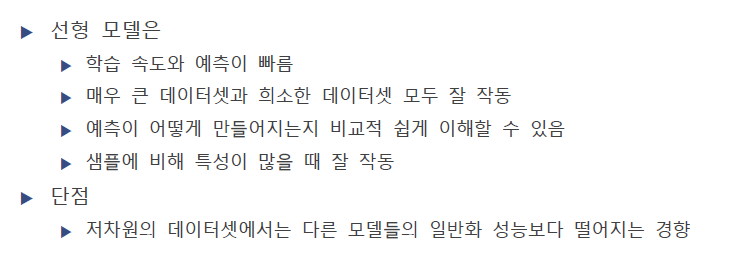

참고
 - ML교안11-Supervised-learning-with-scikit-learn.pdf
 - Machine Learning with Python Sklearn